# Overview

**The main Goal**: For this Episode of the Series, is to use binary classification to predict a patient's smoking status given information about various other health indicators.

## About Dataset

Smoking has been proven to negatively affect health in a multitude of ways.Smoking has been found to harm nearly every organ of the body, cause many diseases, as well as reducing the life expectancy of smokers in general. As of 2018, smoking has been considered the leading cause of preventable morbidity and mortality in the world, continuing to plague the world’s overall health.

According to a World Health Organization report, the number of deaths caused by smoking will reach 10 million by 2030.

Evidence-based treatment for assistance in smoking cessation had been proposed and promoted. however, only less than one third of the participants could achieve the goal of abstinence. Many physicians found counseling for smoking cessation ineffective and time-consuming, and did not routinely do so in daily practice. To overcome this problem, several factors had been proposed to identify smokers who had a better chance of quitting, including the level of nicotine dependence, exhaled carbon monoxide (CO) concentration, cigarette amount per day, the age at smoking initiation, previous quit attempts, marital status, emotional distress, temperament and impulsivity scores, and the motivation to stop smoking. However, individual use of these factors for prediction could lead to conflicting results that were not straightforward enough for the physicians and patients to interpret and apply. Providing a prediction model might be a favorable way to understand the chance of quitting smoking for each individual smoker. Health outcome prediction models had been developed using methods of machine learning over recent years.

A group of scientists are working on predictive models with smoking status as the prediction target.Your task is to help them create a machine learning model to identify the smoking status of an individual using bio-signals

Dataset Description -

* age : 5-years gap
* height(cm)
* weight(kg)
* waist(cm) : Waist circumference length
* eyesight(left)
* eyesight(right)
* hearing(left)
* hearing(right)
* systolic : Blood pressure
* relaxation : Blood pressure
* fasting blood sugar
* Cholesterol : total
* triglyceride
* HDL : cholesterol type
* LDL : cholesterol type
* hemoglobin
* Urine protein
* serum creatinine
* AST : glutamic oxaloacetic transaminase type
* ALT : glutamic oxaloacetic transaminase type
* Gtp : γ-GTP
* dental caries
* smoking

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smoker-status-prediction-using-biosignals/train_dataset.csv
/kaggle/input/smoker-status-prediction-using-biosignals/test_dataset.csv
/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


# Load Packages

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split

import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, auc, roc_curve, classification_report, confusion_matrix, f1_score

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
# The dataset for competition
train = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')

# Let's use original dataset as part of this competition
org_train = pd.read_csv('/kaggle/input/smoker-status-prediction-using-biosignals/train_dataset.csv')

In [4]:
train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [5]:
test_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [6]:
# Drop the 'id' column from train data
train = train.drop(['id'], axis=1)

In [7]:
# All the training data you need

train_data = pd.concat([train, org_train])
train_data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


# Exploratory Data Analysis (EDA)

In [8]:
# The shape of dataset

m, n = train_data.shape
print('Number of rows in dataset : ', m)
print('Number of columns in dataset : ', n)

Number of rows in dataset :  198240
Number of columns in dataset :  23


In [9]:
# Check for null values

train_data.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [10]:
# Describing all columns of the Dataset regardless of data type

train_data.describe(include='all') 

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,...,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000
mean,44.271418,165.153375,66.906709,82.817163,1.007599,1.002519,1.024248,1.023966,122.301488,76.701085,...,56.135951,114.700858,14.763003,1.076650,0.891440,25.650847,26.667282,36.941455,0.201226,0.423583
std,11.886308,8.895587,12.656868,9.039363,0.422827,0.414241,0.153820,0.152943,12.920634,9.135720,...,14.106668,31.601535,1.460424,0.359204,0.188198,12.014495,21.119268,35.637177,0.400917,0.494127
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,77.000000,0.800000,0.800000,1.000000,1.000000,113.000000,70.000000,...,46.000000,94.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,77.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,23.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,65.000000,134.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [11]:
# information about the dataset

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198240 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  198240 non-null  int64  
 1   height(cm)           198240 non-null  int64  
 2   weight(kg)           198240 non-null  int64  
 3   waist(cm)            198240 non-null  float64
 4   eyesight(left)       198240 non-null  float64
 5   eyesight(right)      198240 non-null  float64
 6   hearing(left)        198240 non-null  int64  
 7   hearing(right)       198240 non-null  int64  
 8   systolic             198240 non-null  int64  
 9   relaxation           198240 non-null  int64  
 10  fasting blood sugar  198240 non-null  int64  
 11  Cholesterol          198240 non-null  int64  
 12  triglyceride         198240 non-null  int64  
 13  HDL                  198240 non-null  int64  
 14  LDL                  198240 non-null  int64  
 15  hemoglobin           19

In [12]:
# Number of Duplicated Rows 

train_data.duplicated().sum()

5517

In [13]:
# The features of training data

features = list(train_data.columns)
features.remove('smoking')
print(f'The features in the dataset: \n{features}')

The features in the dataset: 
['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']


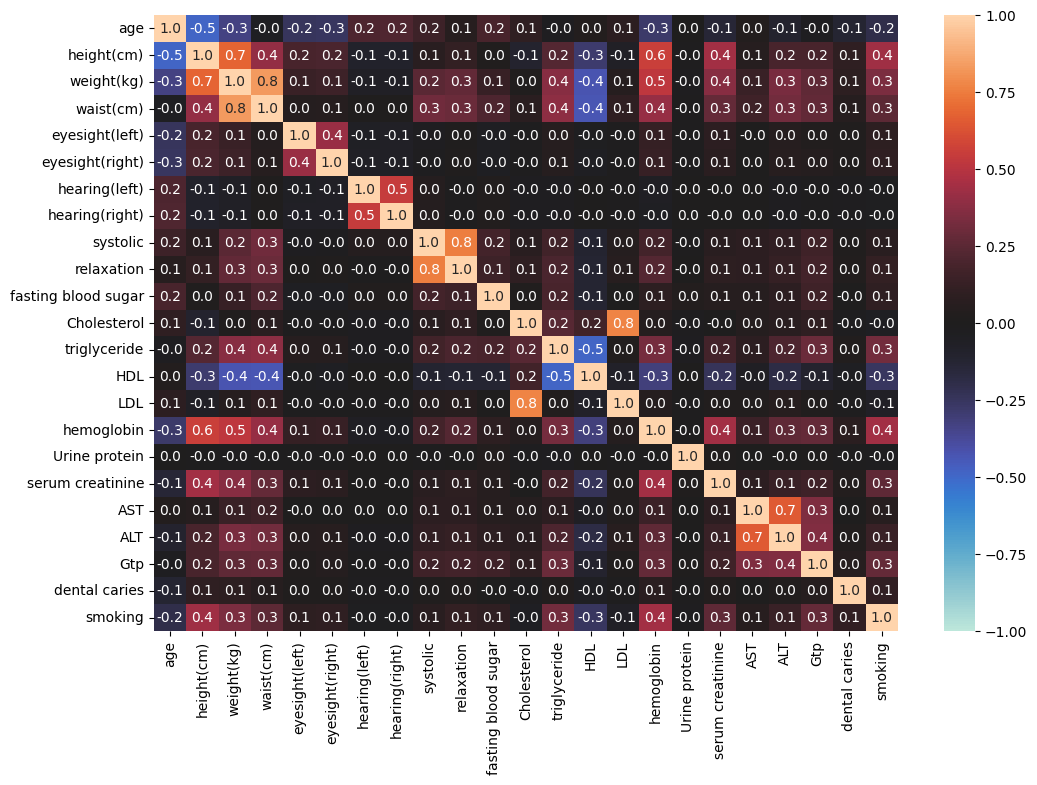

In [14]:
# A correlation matrix to get correlation coefficients between variables

plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), 
            annot = True, 
            fmt='.1f', 
            vmin=-1, 
            vmax=1, 
            center=0)
plt.show()

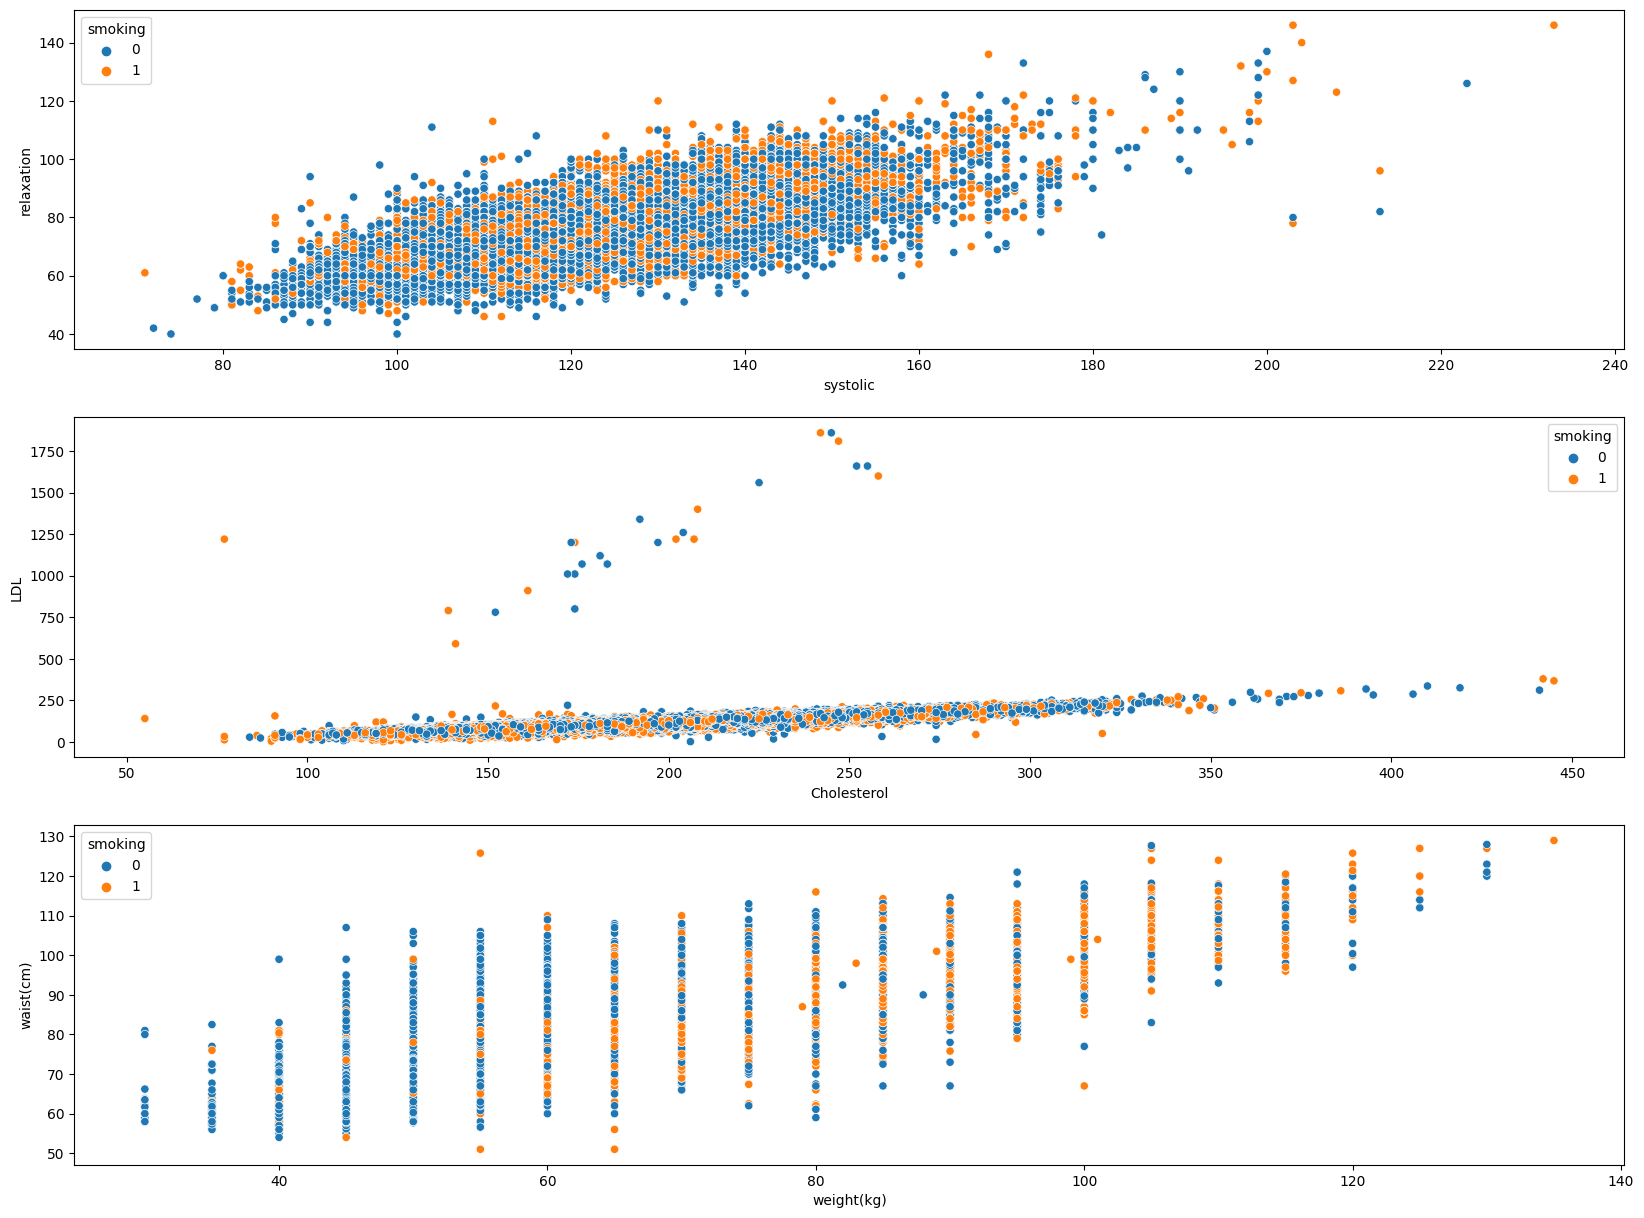

In [15]:
# Scatter plot of highly correlated variables

fig, axes = plt.subplots(3, 1, figsize=(20, 15))

sns.scatterplot(ax=axes[0], 
                data=train_data, 
                x='systolic', 
                y='relaxation', 
                hue=train_data['smoking'])

sns.scatterplot(ax=axes[1], 
                data=train_data, 
                x='Cholesterol', 
                y='LDL', 
                hue=train_data['smoking'])

sns.scatterplot(ax=axes[2], 
                data=train_data, 
                x='weight(kg)', 
                y='waist(cm)', 
                hue=train_data['smoking'])

plt.show()

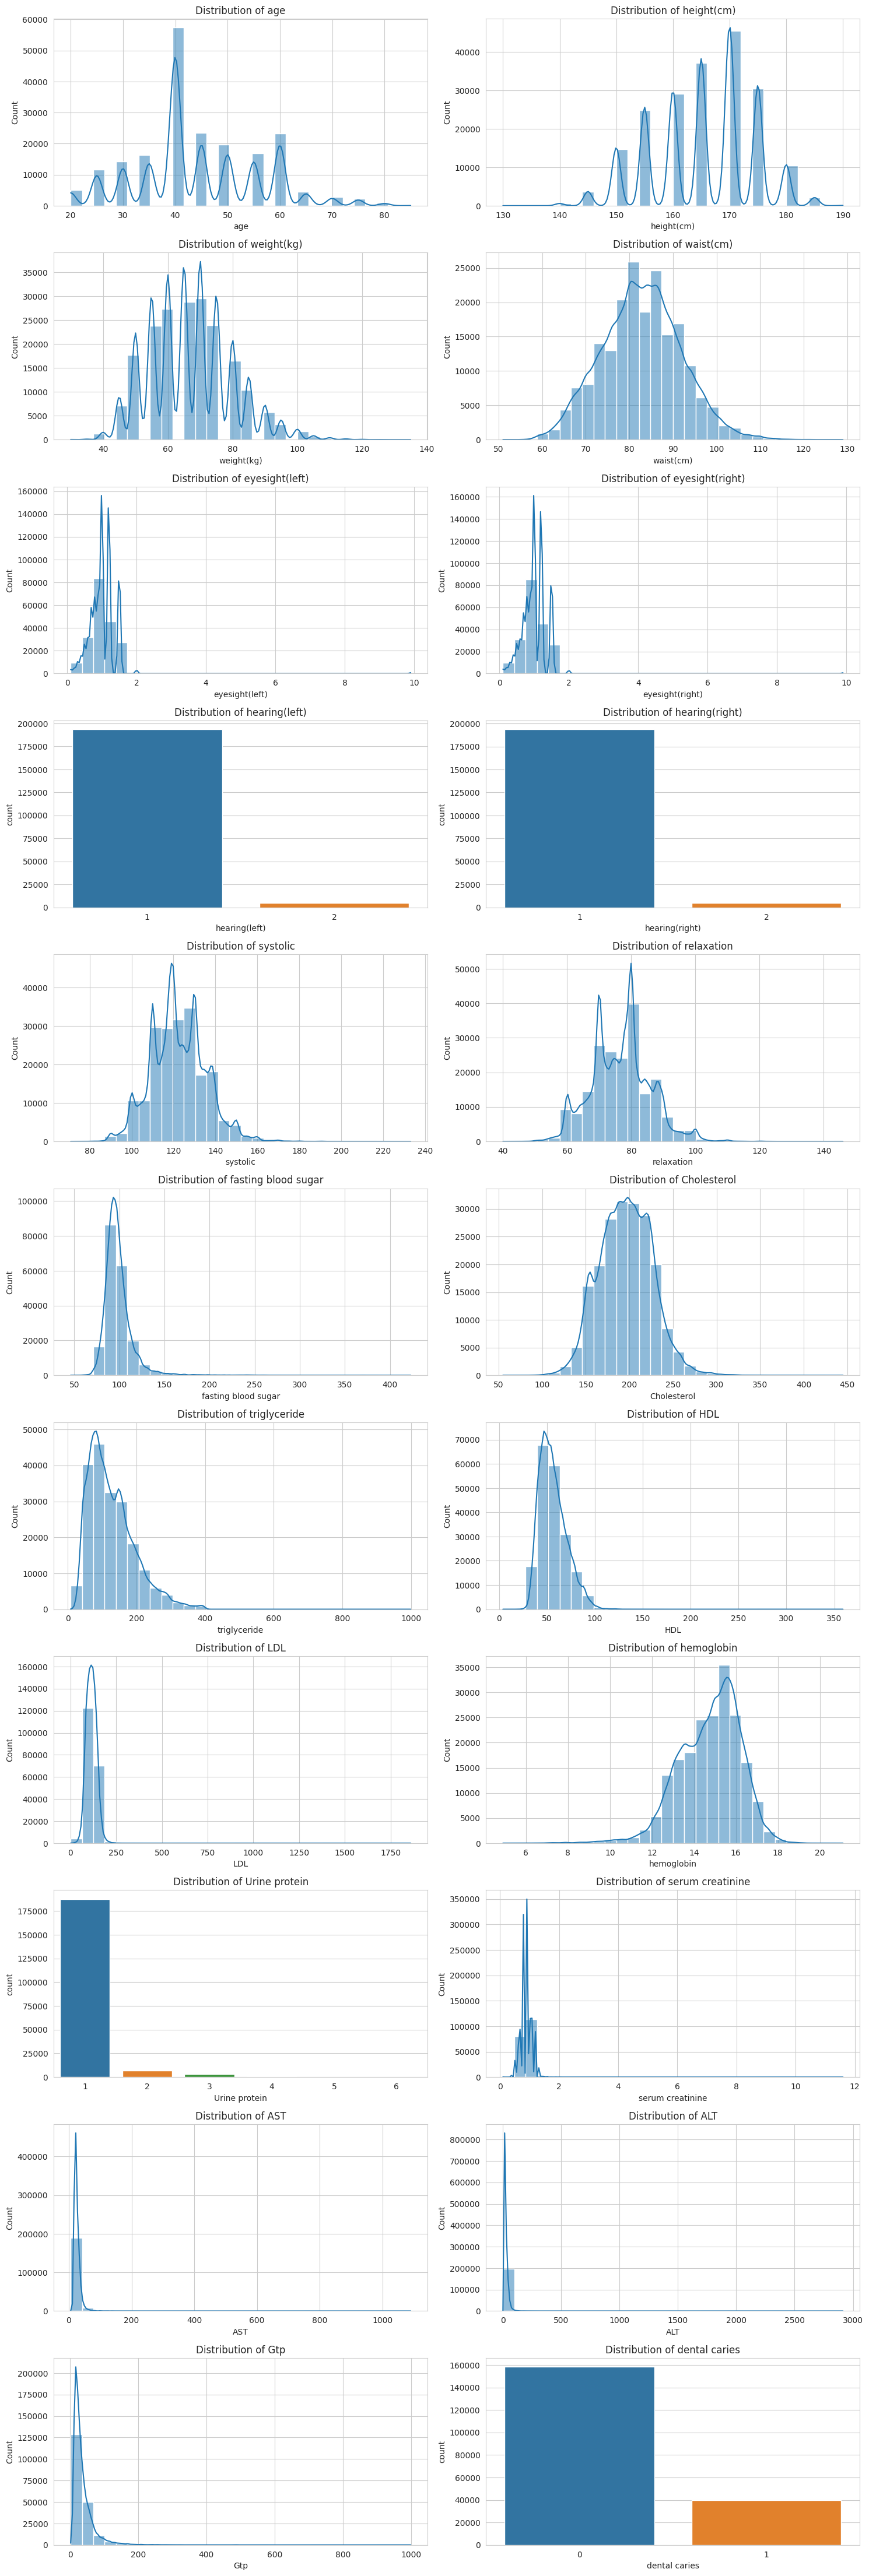

In [16]:
# Let's show the distribution of dataset variables

sns.set_style('whitegrid')

# List of column names to plot
columns_to_plot = train_data.columns.drop(['smoking'])

num_rows = len(columns_to_plot)
plt.figure(figsize=(15, 4 * num_rows))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, 2, i)
    
    if train_data[column].nunique() <= 10:
        sns.countplot(x=column, data=train_data)
    else:
        sns.histplot(train_data[column], kde=True, bins=30)
        
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    
plt.show()

In [17]:
# Get the number of unique elements in each column

train_data.nunique()

age                     18
height(cm)              15
weight(kg)              29
waist(cm)              548
eyesight(left)          20
eyesight(right)         18
hearing(left)            2
hearing(right)           2
systolic               128
relaxation              94
fasting blood sugar    259
Cholesterol            279
triglyceride           393
HDL                    123
LDL                    286
hemoglobin             144
Urine protein            6
serum creatinine        34
AST                    196
ALT                    230
Gtp                    444
dental caries            2
smoking                  2
dtype: int64

## The target column (smoking)

In [18]:
# Show the count of unique values in the smoking column

Uniq_vals = train_data['smoking'].value_counts()
Uniq_vals

smoking
0    114269
1     83971
Name: count, dtype: int64

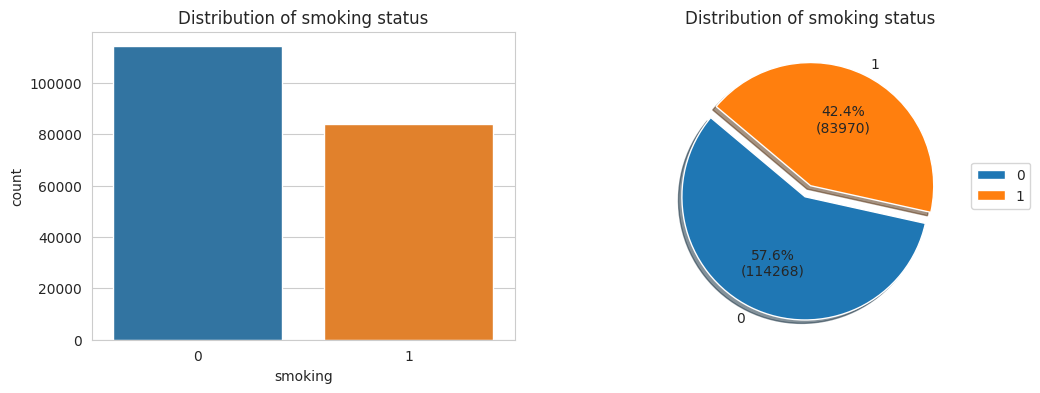

In [19]:
# Plotting the distribution of the target variable 'smoking'

LABELS = ['0', '1']

# Creating autocpt arguments for pie chart
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)


plt.figure(figsize=(12, 4))

# plot 1:
plt.subplot(1, 2, 1)
sns.countplot(train_data, x='smoking')
plt.title('Distribution of smoking status')

# plot 2:
plt.subplot(1, 2, 2)
plt.pie(Uniq_vals, 
       labels=LABELS, 
       autopct=lambda pct: func(pct, Uniq_vals), 
       shadow = True, 
       explode = (0.1, 0), 
       startangle = 140)

plt.legend(loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.title('Distribution of smoking status')
plt.show()

In [20]:
cols_to_plot = [col for col in features if train_data[col].nunique() > 10]
cols_to_plot

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp']

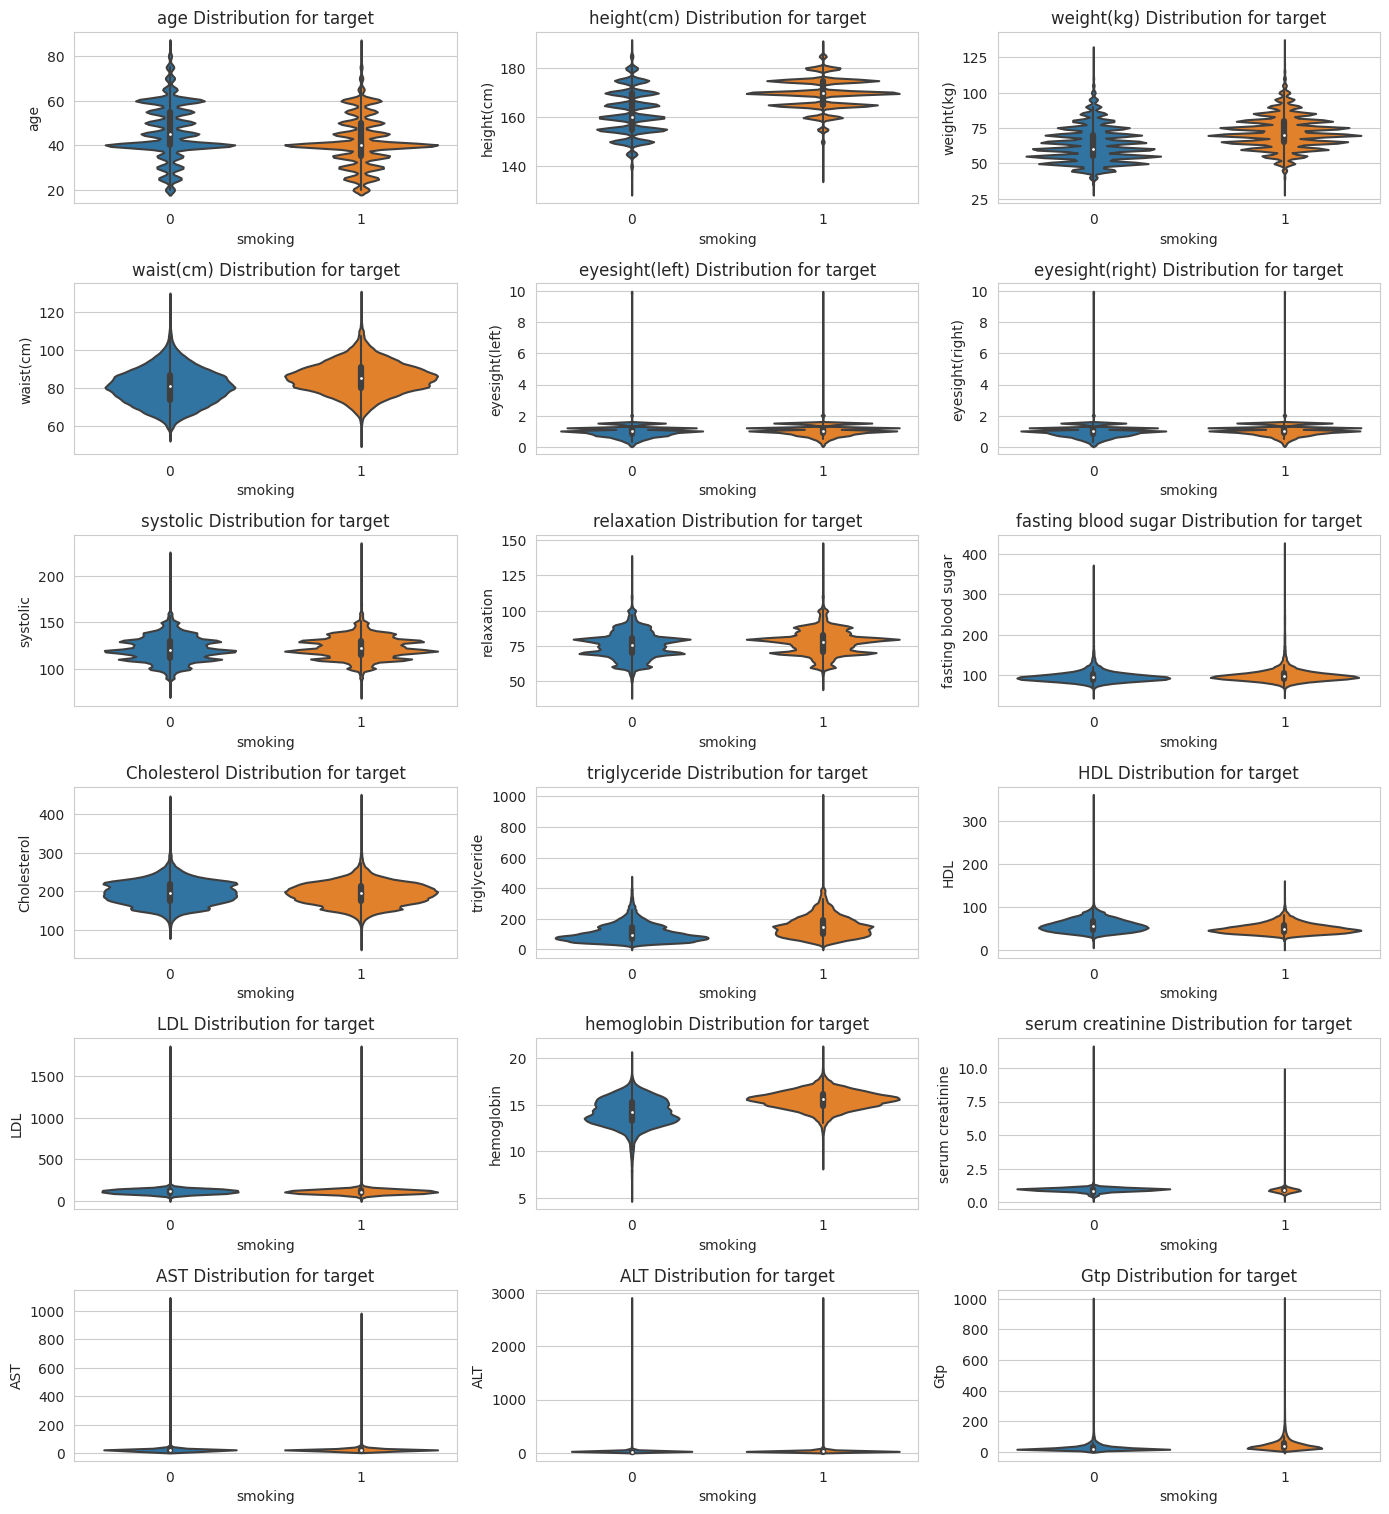

In [21]:
# Distribution of the target variable

num_rows = len(cols_to_plot)
num_cols = 3 

total_plots = num_rows * num_cols
plt.figure(figsize=(14, num_rows * 2.5))

for idx, col in enumerate(cols_to_plot):
    plt.subplot(num_rows, num_cols, idx % total_plots + 1)
    sns.violinplot(x=train_data['smoking'], y=col, data=train_data)
    plt.title(f"{col} Distribution for target")

plt.tight_layout()
plt.show()

# Data Preprocessing

In [22]:
# Remove duplicate rows from a Dataset

train_data = train_data.drop_duplicates()

In [23]:
# Check for duplicate rows 
train_data.duplicated().sum()

0

In [24]:
'''
# Feature Engineering for training data

def create_features(df):
    df['BMI'] = df['weight(kg)'] / ((df['height(cm)'] / 100) ** 2)
    df['HW_Ratio'] = df['height(cm)'] / df['waist(cm)']
    df['HA_Ratio'] = df['height(cm)'] / df['age']
    
    df['HDL-LDL Ratio'] = df['HDL'] / df['LDL']
    df["HDL-triglyceride Ratio"] = df["HDL"] / df["triglyceride"]
    df["LDL-triglyceride Ratio"] = df["LDL"] / df["triglyceride"]
    df["Liver Enzyme Ratio"] = df["AST"] / df["ALT"]
    return df

train_data = create_features(train_data)
'''

'\n# Feature Engineering for training data\n\ndef create_features(df):\n    df[\'BMI\'] = df[\'weight(kg)\'] / ((df[\'height(cm)\'] / 100) ** 2)\n    df[\'HW_Ratio\'] = df[\'height(cm)\'] / df[\'waist(cm)\']\n    df[\'HA_Ratio\'] = df[\'height(cm)\'] / df[\'age\']\n    \n    df[\'HDL-LDL Ratio\'] = df[\'HDL\'] / df[\'LDL\']\n    df["HDL-triglyceride Ratio"] = df["HDL"] / df["triglyceride"]\n    df["LDL-triglyceride Ratio"] = df["LDL"] / df["triglyceride"]\n    df["Liver Enzyme Ratio"] = df["AST"] / df["ALT"]\n    return df\n\ntrain_data = create_features(train_data)\n'

In [25]:
'''
# Feature Engineering for testing data

def create_features(df):
    df['BMI'] = df['weight(kg)'] / ((df['height(cm)'] / 100) ** 2)
    df['HW_Ratio'] = df['height(cm)'] / df['waist(cm)']
    df['HA_Ratio'] = df['height(cm)'] / df['age']
    
    df['HDL-LDL Ratio'] = df['HDL'] / df['LDL']
    df["HDL-triglyceride Ratio"] = df["HDL"] / df["triglyceride"]
    df["LDL-triglyceride Ratio"] = df["LDL"] / df["triglyceride"]
    df["Liver Enzyme Ratio"] = df["AST"] / df["ALT"]
    return df

test_data = create_features(test_data)
'''

'\n# Feature Engineering for testing data\n\ndef create_features(df):\n    df[\'BMI\'] = df[\'weight(kg)\'] / ((df[\'height(cm)\'] / 100) ** 2)\n    df[\'HW_Ratio\'] = df[\'height(cm)\'] / df[\'waist(cm)\']\n    df[\'HA_Ratio\'] = df[\'height(cm)\'] / df[\'age\']\n    \n    df[\'HDL-LDL Ratio\'] = df[\'HDL\'] / df[\'LDL\']\n    df["HDL-triglyceride Ratio"] = df["HDL"] / df["triglyceride"]\n    df["LDL-triglyceride Ratio"] = df["LDL"] / df["triglyceride"]\n    df["Liver Enzyme Ratio"] = df["AST"] / df["ALT"]\n    return df\n\ntest_data = create_features(test_data)\n'

In [26]:
# Let's split features from target 

X = train_data.drop(['smoking'], axis=1)
y = train_data['smoking']

# Modeling

## Splitting data

In [27]:
SEED = np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=SEED, 
                                                    shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (129124, 22)
X_test shape is  (63599, 22)
y_train shape is  (129124,)
y_test shape is  (63599,)


## Hyperparameters optimization using Optuna for XGBoost

In [28]:
'''
# Create an Optuna objective function
def objective(trial):
    params = {
        'n_estimators' : trial.suggest_int('n_estimators', 500, 750),
        'max_depth':  trial.suggest_int('max_depth', 3, 50),
        'min_child_weight': trial.suggest_float('min_child_weight', 2, 50),
        "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.2,log=True),
        'subsample': trial.suggest_float('subsample', 0.2, 1),
        'gamma': trial.suggest_float("gamma", 1e-4, 1.0),
        "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1),
        "colsample_bylevel" : trial.suggest_float('colsample_bylevel',0.2,1),
        "colsample_bynode" : trial.suggest_float('colsample_bynode',0.2,1),
    }
    
    # Build the xgboost model
    optuna_xgbmodel = XGBClassifier(**params,
                                    random_state=SEED,
                                    device="gpu",
                                    eval_metric= "auc")
    # Evaluate the model
    cv = cross_val_score(optuna_xgbmodel, X, y, cv = 4, scoring='roc_auc').mean()
    return cv

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=5000)
'''

'\n# Create an Optuna objective function\ndef objective(trial):\n    params = {\n        \'n_estimators\' : trial.suggest_int(\'n_estimators\', 500, 750),\n        \'max_depth\':  trial.suggest_int(\'max_depth\', 3, 50),\n        \'min_child_weight\': trial.suggest_float(\'min_child_weight\', 2, 50),\n        "learning_rate" : trial.suggest_float(\'learning_rate\',1e-4, 0.2,log=True),\n        \'subsample\': trial.suggest_float(\'subsample\', 0.2, 1),\n        \'gamma\': trial.suggest_float("gamma", 1e-4, 1.0),\n        "colsample_bytree" : trial.suggest_float(\'colsample_bytree\',0.2,1),\n        "colsample_bylevel" : trial.suggest_float(\'colsample_bylevel\',0.2,1),\n        "colsample_bynode" : trial.suggest_float(\'colsample_bynode\',0.2,1),\n    }\n    \n    # Build the xgboost model\n    optuna_xgbmodel = XGBClassifier(**params,\n                                    random_state=SEED,\n                                    device="gpu",\n                                    eval_metr

## XGBoost Model

In [29]:
# Best hyperparameters for XGB Classifier
xgb_params = {'n_estimators': 727, 
              'max_depth': 44, 
              'min_child_weight': 42.394074475465935, 
              'learning_rate': 0.018945904767046495, 
              'subsample': 0.9976305222111156, 
              'gamma': 0.23054785929528437, 
              'colsample_bytree': 0.4156956766282452, 
              'colsample_bylevel': 0.9225226228188033, 
              'colsample_bynode': 0.686558727709571
             }

# Build the XGBoost model
XGBModel = XGBClassifier(**xgb_params, random_state=SEED)

# Train the model
# XGBModel.fit(X_train, y_train)

In [30]:
# Evaluate the model 
cross_val_score(XGBModel, X, y, scoring='roc_auc', cv=4).mean()

0.8697054894155771

## Hyperparameters optimization using Optuna for LightGBM

In [31]:
'''
# Create an Optuna objective function
def objective(trial):
    params = {
        'n_estimators' : trial.suggest_int('n_estimators', 500, 2500),
        'max_depth' : trial.suggest_int('max_depth', 3, 50),
        'learning_rate' : trial.suggest_float('learning_rate',1e-4, 0.25, log=True),
        'min_child_weight : trial.suggest_float('min_child_weight', 0.5, 4),
        'min_child_samples' : trial.suggest_int('min_child_samples', 1, 250),
        'subsample' : trial.suggest_float('subsample', 0.2, 1),
        'subsample_freq' : trial.suggest_int('subsample_freq', 0, 5),
        'colsample_bytree' : trial.suggest_float('colsample_bytree', 0.2, 1),
        'num_leaves' : trial.suggest_int('num_leaves', 2, 128),
    }
    
    # Build the lgbm model
    lgbmmodel_optuna = LGBMClassifier(**params,
    )
    # Evaluate the model
    cv = cross_val_score(lgbmmodel_optuna, X, y, cv = 4, scoring='roc_auc').mean()
    return cv

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=2000)
'''

"\n# Create an Optuna objective function\ndef objective(trial):\n    params = {\n        'n_estimators' : trial.suggest_int('n_estimators', 500, 2500),\n        'max_depth' : trial.suggest_int('max_depth', 3, 50),\n        'learning_rate' : trial.suggest_float('learning_rate',1e-4, 0.25, log=True),\n        'min_child_weight : trial.suggest_float('min_child_weight', 0.5, 4),\n        'min_child_samples' : trial.suggest_int('min_child_samples', 1, 250),\n        'subsample' : trial.suggest_float('subsample', 0.2, 1),\n        'subsample_freq' : trial.suggest_int('subsample_freq', 0, 5),\n        'colsample_bytree' : trial.suggest_float('colsample_bytree', 0.2, 1),\n        'num_leaves' : trial.suggest_int('num_leaves', 2, 128),\n    }\n    \n    # Build the lgbm model\n    lgbmmodel_optuna = LGBMClassifier(**params,\n    )\n    # Evaluate the model\n    cv = cross_val_score(lgbmmodel_optuna, X, y, cv = 4, scoring='roc_auc').mean()\n    return cv\n\n# Create the Optuna study\nstudy = opt

## LightGBM Model

In [32]:
# Best hyperparameters for LGBM Classifier
lgbm_params = {'n_estimators': 624, 
               'max_depth': 46, 
               'learning_rate': 0.06953273561619135, 
               'min_child_weight': 2.4187716216112944, 
               'min_child_samples': 230, 
               'subsample': 0.9515130309407626, 
               'subsample_freq': 4, 
               'colsample_bytree': 0.402284262124352, 
               'num_leaves': 71
              }

# Build the LightGBM model
LGBMModel = LGBMClassifier(**lgbm_params, random_state=SEED)

# Train the model
# LGBMModel.fit(X_train, y_train)

In [33]:
# Evaluate the model 
cross_val_score(LGBMModel, X, y, cv=4, scoring = 'roc_auc').mean()

0.8700781523520573

## Grid Search for CatBoost

In [34]:
'''
CBC = CatBoostClassifier()

parameters = {'iterations'    : [1000, 1100, 1200, 1300, 1400, 1500, 1600]}

Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 5, n_jobs=-1)
Grid_CBC.fit(X_train, y_train, verbose=250)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)
'''

'\nCBC = CatBoostClassifier()\n\nparameters = {\'iterations\'    : [1000, 1100, 1200, 1300, 1400, 1500, 1600]}\n\nGrid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 5, n_jobs=-1)\nGrid_CBC.fit(X_train, y_train, verbose=250)\n\nprint(" Results from Grid Search " )\nprint("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)\nprint("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)\nprint("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)\n'

## CatBoost Model

In [35]:
# Build the CatBoost model
CatModel = CatBoostClassifier(iterations=1500,
                              verbose=250,
                              random_seed=SEED)

# Train the model
# CatModel.fit(X_train, y_train)

In [36]:
# Evaluate a score by cross-validation
cross_val_score(CatModel, X, y, cv=4, scoring='roc_auc').mean()

Learning rate set to 0.059399
0:	learn: 0.6637116	total: 91.1ms	remaining: 2m 16s
250:	learn: 0.4465090	total: 6.65s	remaining: 33.1s
500:	learn: 0.4350832	total: 13s	remaining: 25.9s
750:	learn: 0.4261968	total: 19.5s	remaining: 19.5s
1000:	learn: 0.4183187	total: 26.2s	remaining: 13s
1250:	learn: 0.4112044	total: 32.5s	remaining: 6.48s
1499:	learn: 0.4045695	total: 38.9s	remaining: 0us
Learning rate set to 0.059399
0:	learn: 0.6638220	total: 30.2ms	remaining: 45.2s
250:	learn: 0.4459612	total: 6.63s	remaining: 33s
500:	learn: 0.4347686	total: 13.5s	remaining: 26.9s
750:	learn: 0.4256985	total: 19.7s	remaining: 19.7s
1000:	learn: 0.4179985	total: 26.1s	remaining: 13s
1250:	learn: 0.4107863	total: 32.6s	remaining: 6.49s
1499:	learn: 0.4039764	total: 39s	remaining: 0us
Learning rate set to 0.059399
0:	learn: 0.6638978	total: 29.7ms	remaining: 44.5s
250:	learn: 0.4473276	total: 7.43s	remaining: 37s
500:	learn: 0.4359747	total: 13.9s	remaining: 27.7s
750:	learn: 0.4273493	total: 20.5s	rem

0.866319362358568

## Make predictions

In [37]:
# Fit LGBM Model
LGBMModel.fit(X_train, y_train)
# predict X_test
y_pred = LGBMModel.predict(X_test)
y_pred[:10]

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [38]:
y_pred_proba = LGBMModel.predict_proba(X_test)[:, 1]
y_pred_proba[:10]

array([0.5140811 , 0.5920159 , 0.4705436 , 0.32185968, 0.03851373,
       0.00412433, 0.79000347, 0.59203864, 0.3923813 , 0.65780477])

# Model evaluation

In [39]:
# Calculate ROC curve and AUC

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8661316590606852


In [40]:
print(f' F1 Score : {f1_score(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

 F1 Score : 0.754877941306072
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.78      0.80     36422
           1       0.72      0.79      0.75     27177

    accuracy                           0.78     63599
   macro avg       0.78      0.78      0.78     63599
weighted avg       0.79      0.78      0.78     63599



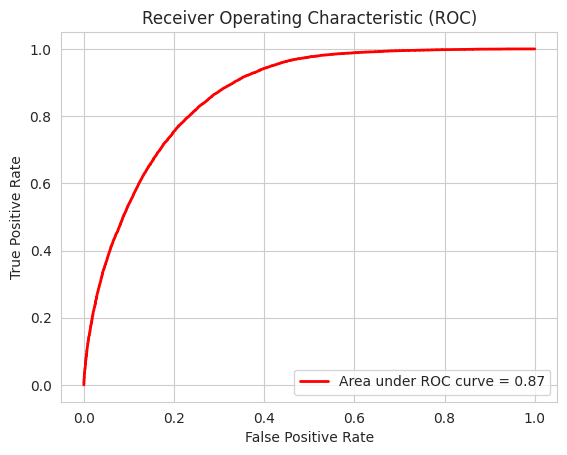

In [41]:
# AUC: Area Under the ROC Curve

def plot_roc_curve(y_test, y_pred_proba):
    """
    plots the roc curve based of the probabilities
    """
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, color='red', lw=2, label='Area under ROC curve = %0.2f' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    
plot_roc_curve(y_test, y_pred_proba)

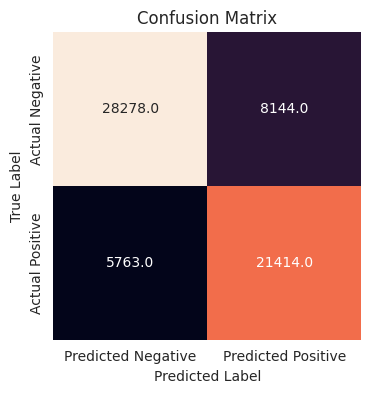

In [42]:
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(CM, 
            annot=True, 
            fmt=".1f",
            square=True,
            cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Make Submission

In [43]:
LGBMModel.fit(X, y)

LGBMClassifier(colsample_bytree=0.402284262124352,
               learning_rate=0.06953273561619135, max_depth=46,
               min_child_samples=230, min_child_weight=2.4187716216112944,
               n_estimators=624, num_leaves=71, subsample=0.9515130309407626,
               subsample_freq=4)

In [44]:
# Make predictions on test_data 
predictions = LGBMModel.predict_proba(test_data.drop(['id'], axis=1))[:, 1]

# Create a submission DataFrame
submission = pd.DataFrame()
submission['id'] = test_data['id']
submission['smoking'] = predictions

# Save a submission to csv file
submission.to_csv('submission.csv', index=False)